In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


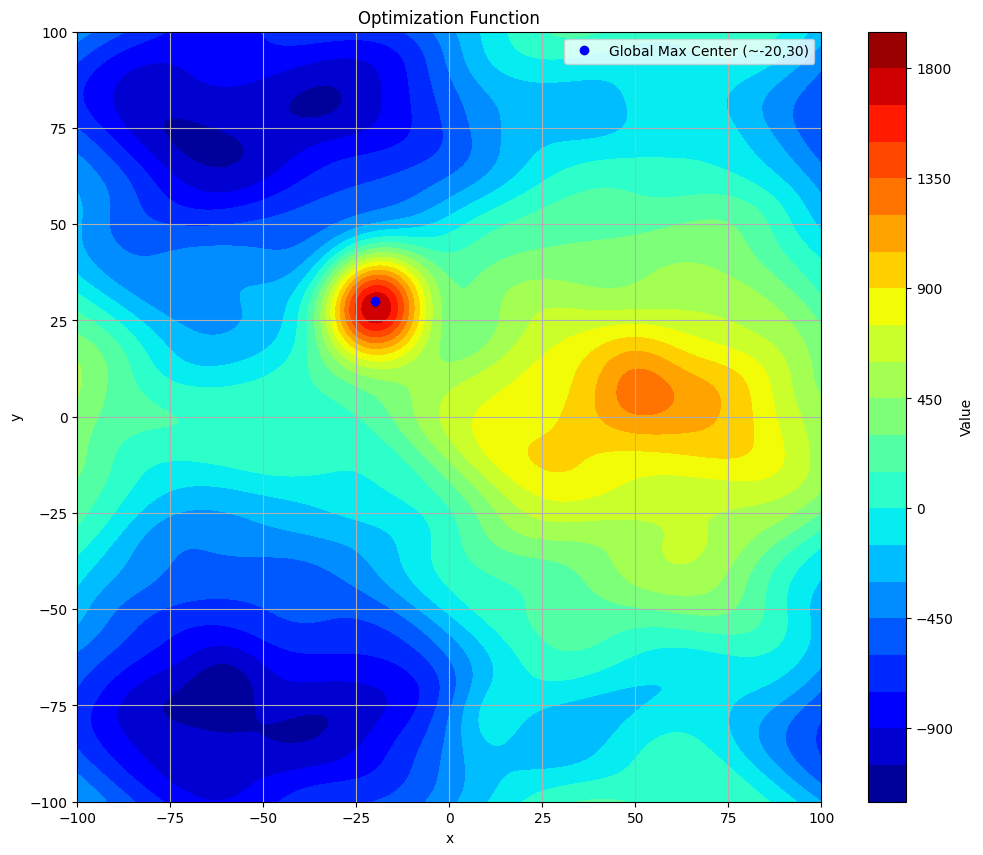

In [2]:

def f(x, y):
    base = 500 * (np.sin(0.03*x) + np.cos(0.04*y))
    dist_global = np.sqrt((x+20)**2 + (y-30)**2)
    global_max = 2000 * np.where(dist_global < 1.5, 1, np.exp(-dist_global**2/200))  
    local_max1 = 300 * np.exp(-((x-50)**2 + (y-10)**2)/150)
    local_min1 = -200 * np.exp(-((x+60)**2 + (y+70)**2)/100)
    local_max2 = 250 * np.exp(-((x-10)**2 + (y+80)**2)/120)
    noise = 80 * (np.sin(0.1*x + np.cos(0.15*y)) + np.cos(0.12*y + np.sin(0.08*x)))
    boundary = -0.003 * (x**2 + y**2)
    
    return base + global_max + local_max1 + local_min1 + local_max2 + noise + boundary

x = np.linspace(-100, 100, 200)
y = np.linspace(-100, 100, 200)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)

plt.figure(figsize=(12, 10))
contourf = plt.contourf(X, Y, Z, levels=20, cmap='jet')
plt.colorbar(contourf, label='Value')
plt.title('Optimization Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.plot(-20, 30, 'bo', label='Global Max Center (~-20,30)')
plt.legend()

plt.show()

In [3]:
x = np.linspace(-100, 100, 200)
y = np.linspace(-100, 100, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

d = 2
xMin, xMax = -100, 100
yMin, yMax = -100, 100
vMin, vMax = -10, 10
n_iter = 100
ps = 40
c1 = 2
c2 = 2
w = 0.9 - ((0.9 - 0.4) / n_iter) * np.linspace(0, n_iter, n_iter)

def limitv(V):
    return np.clip(V, vMin, vMax)

def limitp(P):
    return np.clip(P, xMin, xMax)

In [4]:
class Particle:
    def __init__(self):
        self.positon = np.random.uniform(xMin, xMax, [ps, d])
        self.velocity = np.random.uniform(vMin, vMax, [ps, d])
        self.cost = -f(self.positon[:, 0], self.positon[:, 1])
        self.pbest = np.copy(self.positon)
        self.pbest_cost = np.copy(self.cost)
        self.index = np.argmin(self.pbest_cost)
        self.gbest = self.pbest[self.index].copy()
        self.gbest_cost = self.pbest_cost[self.index]
        self.bestcost = np.zeros(n_iter)

    def evaluate(self):
        particle_positions = []  
        for i in range(n_iter):
            for j in range(ps):
                
                self.velocity[j] = (w[i] * self.velocity[j] +c1 * np.random.rand(d) * (self.pbest[j] - self.positon[j]) +c2 * np.random.rand(d) * (self.gbest - self.positon[j]))
                self.velocity[j] = limitv(self.velocity[j])

                self.positon[j] += self.velocity[j]
                self.positon[j] = limitp(self.positon[j])

                self.cost[j] = -f(self.positon[j][0], self.positon[j][1])

                if self.cost[j] < self.pbest_cost[j]:
                    self.pbest_cost[j] = self.cost[j]
                    self.pbest[j] = self.positon[j].copy()

                    if self.pbest_cost[j] < self.gbest_cost:
                        self.gbest_cost = self.pbest_cost[j]
                        self.gbest = self.pbest[j].copy()

            self.bestcost[i] = self.gbest_cost
            
            particle_positions.append(self.positon.copy())
        
        return self.gbest, self.gbest_cost, particle_positions


In [5]:
fun = Particle()
best_solution, best_value, particle_positions = fun.evaluate()
print(f"Best Solution: {best_solution}")
print(f"Best Value: {-best_value}") 

Best Solution: [-19.68290911  28.53391297]
Best Value: 1811.1331182595943


C:\Users\ali0a\AppData\Local\Temp\ipykernel_2812\1496770250.py:16: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


GIF saved at: particle_swarm_optimization.gif


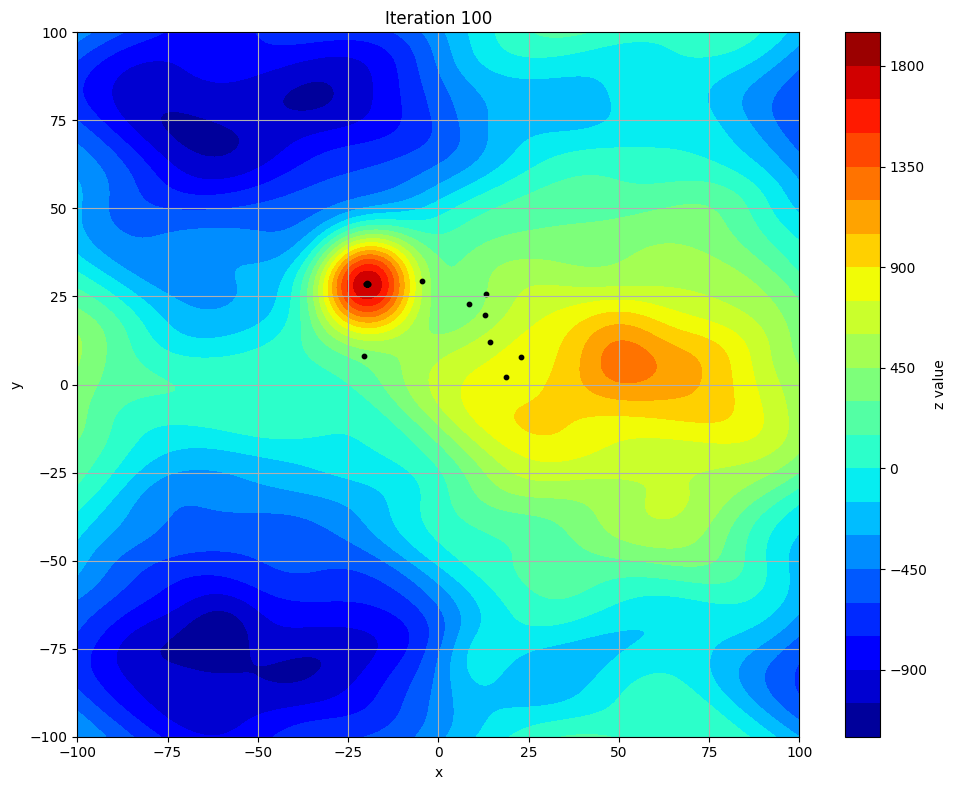

In [6]:
frames = []
for i in range(n_iter):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.contourf(X, Y, Z, levels=20, cmap='jet')
    contourf = ax.contourf(X, Y, Z, levels=20, cmap='jet')
    ax.scatter(particle_positions[i][:, 0], particle_positions[i][:, 1], color='black', s=10)
    ax.set_title(f'Iteration {i + 1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)

    cbar = plt.colorbar(contourf, ax=ax, label='z value')
    plt.tight_layout()
    fig.canvas.draw()

    img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(Image.fromarray(img))
    
    if i != (n_iter-1):
        plt.close(fig)

gif_path = "particle_swarm_optimization.gif"
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved at: {gif_path}")